In [15]:
# 데이터 형식에서 리스트 배열 딕셔너리 <--> 시리즈 , 데이터프레임 서로 변환함
import pandas as pd
file_data = pd.read_csv('./dataset/file_data.csv') # .csv 파일을 dateframe형태로 가져옴
file_data['가격'] =[5000,5000,4000,5000,3000] # 새로운 컬럼 추가 및 업데이트
file_data

,차림표,가격
0,냉면,5000
1,칼국수,5000
2,잔치국수,4000
3,수제비,5000
4,우동,3000


In [16]:
# 데이터프레임 갱신
df1= file_data.copy() # 원본은 냅두고 카피로 처리
df2 = pd.DataFrame({
    '차림표':['비빔밥','돈까스','라면','김밥','제육덮밥'], # 데이터 프레임을 딕셔너리 형태로
    '가격':[7000,8000,3000,3000,9000]
})
df2

,차림표,가격
0,비빔밥,7000
1,돈까스,8000
2,라면,3000
3,김밥,3000
4,제육덮밥,9000


In [17]:
# 병합 - 수직방향 --> 디폴트가 세로 방향 -> 행 방향
dfc1 = pd.concat([df1,df2])
dfc1

,차림표,가격
0,냉면,5000
1,칼국수,5000
2,잔치국수,4000
3,수제비,5000
4,우동,3000
0,비빔밥,7000
1,돈까스,8000
2,라면,3000
3,김밥,3000
4,제육덮밥,9000


In [18]:
# 병합 - 가로방향 -> 열 방향
dfc2 = pd.concat([df1,df2],axis =1) 
dfc2
# axis는 DataFrame에 적용되는 방향을 지정
# axis=0 함수가 행 단위로, axis=1 은 함수가 열 단위로 적용
# axis=0 행방향 동작 -> 작업 결과가 행으로 나타남 * 책을 아래로 쌓아 정리
# axis=1 열방향 동작 -> 작업 결과가 열로 나타남  * 책을 세워 옆으로 정리

,차림표,가격,차림표,가격
0,냉면,5000,비빔밥,7000
1,칼국수,5000,돈까스,8000
2,잔치국수,4000,라면,3000
3,수제비,5000,김밥,3000
4,우동,3000,제육덮밥,9000


In [19]:
new_column=['메뉴1','가격1','메뉴2','가격2'] # 칼럼 변경
dfc2.columns=new_column # DF.colimns에 new column을 넣어줌
dfc2

,메뉴1,가격1,메뉴2,가격2
0,냉면,5000,비빔밥,7000
1,칼국수,5000,돈까스,8000
2,잔치국수,4000,라면,3000
3,수제비,5000,김밥,3000
4,우동,3000,제육덮밥,9000


In [20]:
sr1=dfc2['메뉴1'] # 데이터프레임에서 하나의 칼럼을 선택하면 -> 시리즈가 됨
sr2=dfc2['가격2'] # 하지만 하나의 컬럼이라도 데이터프레임을 유지할 수 있음 -> 어떻게 -> [[ ]] 대괄호 2개 사용하면 가능
print(sr1,'\n')
print(sr2)

0      냉면
1     칼국수
2    잔치국수
3     수제비
4      우동
Name: 메뉴1, dtype: object 

0    7000
1    8000
2    3000
3    3000
4    9000
Name: 가격2, dtype: int64


In [17]:
# 가져온 칼럼이 시리즈 -> 데이터프레임(시리즈의 모임)
# 시리즈는 컬럼 네임을 안줘도 가능 -> 시리즈의 네임이 컬럼 네임으로 할당 -> 리스트 배열 튜플은 컬럼 네임 줘야함
df = pd.concat([sr1,sr2],axis=1) 
df # 열 방향으로 병합 -> 세워 붙임

,메뉴1,가격2
0,냉면,7000
1,칼국수,8000
2,잔치국수,3000
3,수제비,3000
4,우동,9000


In [28]:
# 열 삭제, inplace=True는 원본에 반영함을 의미
dfc3 = dfc2.copy()
dfc3.drop(['가격1','가격2'], axis=1, inplace=True) #가격 삭제 axis =1 열 방향
#dfc3.drop(['가격1','가격2'],axis=1)
dfc3

,메뉴1,메뉴2
0,냉면,비빔밥
1,칼국수,돈까스
2,잔치국수,라면
3,수제비,김밥
4,우동,제육덮밥


In [29]:
# 행 삭제 -> 탐색방향이 아래로 적층 구조에서 삭제
dfc3.drop([0,1], axis=0, inplace=True)
dfc3

,메뉴1,메뉴2
2,잔치국수,라면
3,수제비,김밥
4,우동,제육덮밥


In [30]:
dfc3 =dfc2.copy()
dfc3

,메뉴1,가격1,메뉴2,가격2
0,냉면,5000,비빔밥,7000
1,칼국수,5000,돈까스,8000
2,잔치국수,4000,라면,3000
3,수제비,5000,김밥,3000
4,우동,3000,제육덮밥,9000


In [31]:
# 인덱싱을 이용하여 특정 컬럼, 특정 행, 특정 값을 추출

a=dfc3['메뉴1'] # 메뉴1열 출력
b=dfc3[1:4] # 1~3까지 행
c=dfc3[['가격1','가격2']] # 특정 컬럼을 선택해서 할 때 -> 리스트 형태로 

# 행 인덱싱
# 칼럼이름이나 인덱스 이름으로 loc-> 만약 인덱스 이름이 없고 기본 숫자 인덱스만 있으면 loc도 행 인덱스 처럼 적용 가능
# 숫자 인덱싱할 경우 iloc
x= dfc3.loc[1] # index가 1인 행  
y=dfc3.iloc[1,1] # 1행 1열 -> 5000  
z=dfc3.loc[dfc3['가격2']==3000, ['메뉴2','가격2']]
# 가격이 3000원인 것을 메뉴 2, 가격2 에서 서칭
print(a,'\n')
print(b,'\n')
print(c,'\n')

print(x,'\n')
print(y,'\n')
print(z)

0      냉면
1     칼국수
2    잔치국수
3     수제비
4      우동
Name: 메뉴1, dtype: object 

    메뉴1   가격1  메뉴2   가격2
1   칼국수  5000  돈까스  8000
2  잔치국수  4000   라면  3000
3   수제비  5000   김밥  3000 

    가격1   가격2
0  5000  7000
1  5000  8000
2  4000  3000
3  5000  3000
4  3000  9000 

메뉴1     칼국수
가격1    5000
메뉴2     돈까스
가격2    8000
Name: 1, dtype: object 

5000 

  메뉴2   가격2
2  라면  3000
3  김밥  3000


In [34]:
dfc3

,메뉴1,가격1,메뉴2,가격2
0,냉면,5000,비빔밥,7000
1,칼국수,5000,돈까스,8000
2,잔치국수,4000,라면,3000
3,수제비,5000,김밥,3000
4,우동,3000,제육덮밥,9000


In [32]:
# 조건(하나 또는 복수)에 맞는 데이터 추출- 불린인덱싱
dfc3.loc[dfc3['가격1']>4500,['메뉴1','가격1']]
# 가격 1이 4500 초과한 메뉴 1 가격1

,메뉴1,가격1
0,냉면,5000
1,칼국수,5000
3,수제비,5000


In [33]:
# 행, 열 모두에 조건 지정
dfc3.loc[(dfc3['가격2']>4000) & (dfc3.메뉴2!='돈까스'), ['메뉴2','가격2']]
가격2가 4000원초과하면서 메뉴2가 돈까스가 아닌 메뉴2 가격2 음식

,메뉴2,가격2
0,비빔밥,7000
4,제육덮밥,9000


In [35]:
# 행 추가
dfc3.loc[5]=['김치라면','4000','만두','5000']  # 5번 인덱스에 값 추가
dfc3

,메뉴1,가격1,메뉴2,가격2
0,냉면,5000,비빔밥,7000
1,칼국수,5000,돈까스,8000
2,잔치국수,4000,라면,3000
3,수제비,5000,김밥,3000
4,우동,3000,제육덮밥,9000
5,김치라면,4000,만두,5000


In [36]:
# 열 추가
dfc3['메뉴3']= dfc3.메뉴2 #dfc3[메뉴]에는 메뉴2를 쓰겟다
dfc3


,메뉴1,가격1,메뉴2,가격2,메뉴3
0,냉면,5000,비빔밥,7000,비빔밥
1,칼국수,5000,돈까스,8000,돈까스
2,잔치국수,4000,라면,3000,라면
3,수제비,5000,김밥,3000,김밥
4,우동,3000,제육덮밥,9000,제육덮밥
5,김치라면,4000,만두,5000,만두


In [37]:
dfc1

,차림표,가격
0,냉면,5000
1,칼국수,5000
2,잔치국수,4000
3,수제비,5000
4,우동,3000
0,비빔밥,7000
1,돈까스,8000
2,라면,3000
3,김밥,3000
4,제육덮밥,9000


In [38]:
# 인덱싱 재정렬
ndf=dfc1.reset_index() # 0부터 순서대로 indexing 
ndf.drop('index',axis=1,inplace=True) # axis=1 열 책을 옆으로 정리 ( 왼쪽+오른쪽 합치기 )
ndf

,차림표,가격
0,냉면,5000
1,칼국수,5000
2,잔치국수,4000
3,수제비,5000
4,우동,3000
5,비빔밥,7000
6,돈까스,8000
7,라면,3000
8,김밥,3000
9,제육덮밥,9000


In [39]:
ndf1=ndf.copy()
ndf1

,차림표,가격
0,냉면,5000
1,칼국수,5000
2,잔치국수,4000
3,수제비,5000
4,우동,3000
5,비빔밥,7000
6,돈까스,8000
7,라면,3000
8,김밥,3000
9,제육덮밥,9000


In [41]:
# 인덱스 설정
import numpy as np
ndf1.index=np.arange(1,11) # arange(1,11)-> index 부여
ndf1

,차림표,가격
1,냉면,5000
2,칼국수,5000
3,잔치국수,4000
4,수제비,5000
5,우동,3000
6,비빔밥,7000
7,돈까스,8000
8,라면,3000
9,김밥,3000
10,제육덮밥,9000


In [42]:
# 인덱스 지정한 대로 설정 : reindex
new_index = np.arange(1,15) 
ndf2=ndf1.reindex(new_index,fill_value=0) # 기존에 있는것 채우고 없으면 0, 만약 0 안주면 nan값으로 할당됨
ndf2

,차림표,가격
1,냉면,5000
2,칼국수,5000
3,잔치국수,4000
4,수제비,5000
5,우동,3000
6,비빔밥,7000
7,돈까스,8000
8,라면,3000
9,김밥,3000
10,제육덮밥,9000


In [43]:
# 내림차순 정렬
ndf2 = ndf1.sort_index(ascending=False)
ndf2

,차림표,가격
10,제육덮밥,9000
9,김밥,3000
8,라면,3000
7,돈까스,8000
6,비빔밥,7000
5,우동,3000
4,수제비,5000
3,잔치국수,4000
2,칼국수,5000
1,냉면,5000


In [44]:
ndf3 = ndf2.sort_index(ascending=True) # 다시 복귀
ndf3

,차림표,가격
1,냉면,5000
2,칼국수,5000
3,잔치국수,4000
4,수제비,5000
5,우동,3000
6,비빔밥,7000
7,돈까스,8000
8,라면,3000
9,김밥,3000
10,제육덮밥,9000


In [46]:
# by='가격' 으로 내림차순
ndf4=ndf2.sort_values(by='가격',ascending=False)
ndf4

,차림표,가격
10,제육덮밥,9000
7,돈까스,8000
6,비빔밥,7000
4,수제비,5000
2,칼국수,5000
1,냉면,5000
3,잔치국수,4000
9,김밥,3000
8,라면,3000
5,우동,3000


In [7]:
import numpy as np
columns=['kor','eng','art','math','gym','sci']
index=['jim','sam','tom','tim','bob']

np.random.seed() #난수의 생성 패턴을 동일하게 관리

data=np.random.randint(70,100, size=(5,6)) # 데이터프레임 생성
df=pd.DataFrame(data,index,columns=columns)
df
#type(df) # 현재 데이터 프레임형식임

,kor,eng,art,math,gym,sci
jim,70,83,72,79,91,87
sam,87,87,73,70,81,79
tom,84,97,86,75,78,86
tim,75,73,92,82,72,82
bob,92,96,84,77,97,83


#### iloc, loc를 이용해서 아래 요구사항들을 출력하세요

- df의 kor열을 series와 dataframe을 각각 출력
- df에서 sam의 math 점수를 출력(2가지 방법)
- df에서 tom의 eng와 sci 점수를 출력(2가지 방법)
- df에서 jim, tim의 eng, gym 점수를 출력
- df에서 jim, sam의 art,math,gym 점수를 출력

In [ ]:
data.iloc[0] # data의 첫번째 행만
data.iloc[1] # 두번째 행만
data.iloc[-1] # 마지막 행만
# Columns:
data.iloc[:,0] # 첫번째 열만
data.iloc[:,1] # 두번째 열만
data.iloc[:,-1] # 마지막 열만

In [ ]:
data.iloc[0:5] # 첫 5개행만
data.iloc[:, 0:2] # 첫 2개열만
data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th 행과 + 1st 6th 7th 열만
data.iloc[0:5, 5:8] # 첫 5개 행과 5th, 6th, 7th 열만

In [8]:
# Series로 출력 -> dataframe의 행이나 칼럼의 순서를 나타내는 정수로 값 추출
a1=df.iloc[:,0] #  [:, 0] -->은 첫번째 열만 가져오겠다는 의미
print(a1, type(a1),'\n')  # --> Series형식

# .iloc[; ,정수] --> 열 값만 출력

a2=df.iloc[:,[0]]  # --> [] 대괄호 덧부처주면 DataFrame형식
print(a2,type(a2))

jim    70
sam    87
tom    84
tim    75
bob    92
Name: kor, dtype: int32 <class 'pandas.core.series.Series'> 

     kor
jim   70
sam   87
tom   84
tim   75
bob   92 <class 'pandas.core.frame.DataFrame'>


In [9]:
# Series로 출력 
a1=df.iloc[:,0] # 데이터프레임의 행이나 칼럼의 순서를 나타내는 정수로 특정 값 추출
print(a1, type(a1),'\n')

jim    70
sam    87
tom    84
tim    75
bob    92
Name: kor, dtype: int32 <class 'pandas.core.series.Series'> 



In [59]:
print(df.loc['sam','math']) #ioc 인덱스명, 칼럼명, 조건식으로 선택
print(df.iloc[1,3]) #정수로 선택

78
78


In [62]:
print(df.loc['tom',['eng','sci']],'\n')
           #  [tom 의[eng sci]] 점수
print(df.iloc[2,[1,5]]) 
        # tom 행 2번째 [첫번째와 다섯번째] 점수

eng    80
sci    74
Name: tom, dtype: int32 

eng    80
sci    74
Name: tom, dtype: int32


In [65]:
print(df.iloc[[0,3],[1,4]])  #1,4 행 2, 5 열 --> 1행 2열, 4행 5열
    # jim의 eng와 tim의 gym의 성적

     eng  gym
jim   70   78
tim   92   85


In [66]:
print(df.loc['jim':'sam','art':'gym'],'\n') # parsing하면 포함됌,math
print(df.iloc[0:2,2:5]) #첫2개행, 2,3,4열

     art  math  gym
jim   70    81   78
sam   76    78   96 

     art  math  gym
jim   70    81   78
sam   76    78   96


###  iloc, loc를 이용해서 아래 요구사항들을 수행하세요
- df에서 sam의 math 점수를 100으로 변경
- df에서 tom의 eng와 math 점수를 100으로 변경
- df에서 jim, tim의 kor, gym 점수를 null값으로 변경
- df에서 math와 gym 점수를 바꾸어 출력

In [11]:
df1=df.copy()
df1.loc['sam','math']=100
df1

,kor,eng,art,math,gym,sci
jim,70,83,72,79,91,87
sam,87,87,73,100,81,79
tom,84,97,86,75,78,86
tim,75,73,92,82,72,82
bob,92,96,84,77,97,83


In [12]:
df2=df.copy()
df2.loc['tom',['eng','math']]=100 # [tom,[eng,math]]
df2

,kor,eng,art,math,gym,sci
jim,70,83,72,79,91,87
sam,87,87,73,70,81,79
tom,84,100,86,100,78,86
tim,75,73,92,82,72,82
bob,92,96,84,77,97,83


In [73]:
# loc는 인덱스 라벨명, 조건식으로 검색
df3=df2.copy()
df3.loc[['jim','tim'],['kor','gym']]=np.nan
df3 

,kor,eng,art,math,gym,sci
jim,NaN,70,70,81,NaN,92
sam,72.0,81,76,78,96.0,81
tom,82.0,100,97,100,77.0,74
tim,NaN,92,78,96,NaN,75
bob,96.0,92,78,91,86.0,97


In [74]:
df

,kor,eng,art,math,gym,sci
jim,79,70,70,81,78,92
sam,72,81,76,78,96,81
tom,82,80,97,71,77,74
tim,80,92,78,96,85,75
bob,96,92,78,91,86,97


In [75]:
#math와 gym을 바꾸어 출력
df2=df.copy()
df2['tmp']=df2.math #바꾼값을 담아줄 변수 선언

df2.math=df2.gym
df2.gym=df2.tmp

df3=df2.drop('tmp',axis=1)
print(df,'\n\n',df3)

     kor  eng  art  math  gym  sci
jim   79   70   70    81   78   92
sam   72   81   76    78   96   81
tom   82   80   97    71   77   74
tim   80   92   78    96   85   75
bob   96   92   78    91   86   97 

      kor  eng  art  math  gym  sci
jim   79   70   70    78   81   92
sam   72   81   76    96   78   81
tom   82   80   97    77   71   74
tim   80   92   78    85   96   75
bob   96   92   78    86   91   97


In [76]:
! pip install seaborn

In [77]:
import seaborn as sns
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#데이터 추출(인덱싱, 조건), 변경, 삭제, 정렬, 칼럼 병합(sibsp + parch = family) 등을 수행하여 데이터에서 인사이트를 찾아보세요 

In [13]:
# 데이터 추출 -> 인덱싱 (loc, iloc)
# 조건 -> 불린 인덱싱으로 조건 걸어준게 참인것만 출력
# 변경 -> 추출과 똑같이 해서 값을 넣어줌
# 삭제 -> drop
# 정렬 -> sort_index , sort_value
# 병합 -> concat (axis=0,1)
import numpy as np
import pandas as pd
data = np.arange(20).reshape(4,5)
df= pd.DataFrame(data, columns=['a','b','c','d','e'])
df.head()

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [104]:
df1=df.copy()
df1.drop(df1.index[[0,3]])
# index 0이랑 3을 삭제 해보린다 --> 삭제한다고 자동으로 0, 1 순서로 안됌

,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14


In [21]:
# 특정 조건에 맞는 인덱스 구하기 ***중요***
df1=df.copy()
idx=df1[df1.a >10].index # 컬럼 a가 10보다 큰거 idx 에 담아
df1.drop(idx) # 그 idx를 삭제해
# 2행 a열은 삭제 안됌 .. why? a>10이므로

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [14]:
# 특정 조건에 맞는 인덱스 구하기
df1=df.copy()
idx=df1[df1.a>10].index
df1.drop(idx)

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [108]:
li=[]
for i in range(100):
    li.append('c'+str(i+1))
print(li)

['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39', 'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49', 'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60', 'c61', 'c62', 'c63', 'c64', 'c65', 'c66', 'c67', 'c68', 'c69', 'c70', 'c71', 'c72', 'c73', 'c74', 'c75', 'c76', 'c77', 'c78', 'c79', 'c80', 'c81', 'c82', 'c83', 'c84', 'c85', 'c86', 'c87', 'c88', 'c89', 'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99', 'c100']


In [111]:
data = np.random.randn(10000).reshape(100,100)
df=pd.DataFrame(data,columns=li)

df['c2']=df.c2*100
df.iloc[1]=df.iloc[1]*100

df.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100
0,-1.085711,-27.858423,0.448810,-1.547231,-0.339270,-0.512804,1.699189,-1.648296,0.966901,0.358511,...,0.415371,-0.738840,1.688800,-1.246670,-0.107032,1.908764,-1.494290,-0.011120,-0.255690,0.497966
1,30.004884,10458.874148,98.390832,-52.183712,-47.221345,157.949907,-82.827856,-152.931753,-41.085166,-57.941729,...,-26.530497,108.253826,162.137754,5.611485,-43.354748,-115.228765,60.023942,135.321622,-49.537486,46.645615
2,1.307426,-54.854032,0.679955,0.538323,0.791227,-0.434783,1.672444,0.113178,1.516102,0.544653,...,1.843928,-0.636981,-0.996145,1.413806,2.186209,-0.510182,-0.342534,-0.466988,-0.634573,-0.204891
3,0.658725,5.323674,0.866645,0.655529,1.070452,-1.056711,-1.713068,0.287071,-0.745977,-1.303472,...,0.099313,-0.395096,-0.072498,-0.127503,-0.430786,-1.504418,0.632424,0.692871,-0.115778,-1.039108
4,-0.520715,-156.016623,-1.482093,-1.780950,1.964815,0.412677,0.080796,0.345653,0.782724,1.019122,...,-2.257006,-0.464926,-0.184402,0.794705,1.128333,-0.446106,0.624462,-0.563383,1.246964,0.074935


In [112]:
df1=df.copy()
idx=df1[df1.c2>10].index
print(idx)

Int64Index([ 1,  6,  7,  9, 10, 11, 15, 20, 22, 23, 24, 26, 27, 29, 31, 33, 35,
            39, 43, 49, 51, 53, 57, 59, 60, 61, 62, 65, 67, 69, 70, 74, 75, 76,
            77, 79, 80, 82, 83, 85, 87, 89, 90, 92, 94, 96, 97, 99],
           dtype='int64')


In [113]:
df1.drop(idx)

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100
0,-1.085711,-27.858423,0.448810,-1.547231,-0.339270,-0.512804,1.699189,-1.648296,0.966901,0.358511,...,0.415371,-0.738840,1.688800,-1.246670,-0.107032,1.908764,-1.494290,-0.011120,-0.255690,0.497966
2,1.307426,-54.854032,0.679955,0.538323,0.791227,-0.434783,1.672444,0.113178,1.516102,0.544653,...,1.843928,-0.636981,-0.996145,1.413806,2.186209,-0.510182,-0.342534,-0.466988,-0.634573,-0.204891
3,0.658725,5.323674,0.866645,0.655529,1.070452,-1.056711,-1.713068,0.287071,-0.745977,-1.303472,...,0.099313,-0.395096,-0.072498,-0.127503,-0.430786,-1.504418,0.632424,0.692871,-0.115778,-1.039108
4,-0.520715,-156.016623,-1.482093,-1.780950,1.964815,0.412677,0.080796,0.345653,0.782724,1.019122,...,-2.257006,-0.464926,-0.184402,0.794705,1.128333,-0.446106,0.624462,-0.563383,1.246964,0.074935
5,-1.877787,-61.848370,1.750935,-1.207826,1.279575,0.229098,0.436033,-0.583634,-0.845816,-0.719565,...,-0.797433,0.333368,0.434810,-1.103644,0.366903,-0.097307,-1.094010,-1.152508,-1.387293,0.082715
8,0.719261,2.553862,-1.215627,0.340846,-0.299706,0.472823,-0.259905,0.156260,0.416275,0.404410,...,0.236856,0.481046,-0.010963,-0.721942,-1.577495,1.109031,0.672995,-0.038275,0.238021,1.068265
12,-0.477117,-44.477418,-0.639239,-0.598723,-0.728968,1.680223,0.375407,-0.260935,0.873267,0.215149,...,-0.667085,0.047109,-0.417668,1.396905,2.719390,-1.647781,0.480114,-1.044265,-3.095318,1.166436
13,0.115391,-53.550112,-0.445432,-0.949493,-0.994480,0.387600,0.314550,-0.828770,-0.103730,-0.175198,...,1.800562,-2.039033,-1.328417,-2.251420,0.358288,0.164023,0.886530,-1.357515,0.561890,-0.194959
14,-0.498074,-32.609465,0.111542,-1.275597,1.145437,-0.436121,1.514866,0.154752,0.580406,0.282114,...,0.268283,0.213889,0.164156,-0.638078,-0.837757,-0.815449,0.127958,0.834937,-0.812815,0.215041
16,-0.803535,-54.017606,-0.026817,-0.130418,-1.110726,0.503617,0.057736,0.140457,0.623407,-0.081674,...,0.919388,0.917724,1.421793,-0.669270,1.688861,0.542698,0.055204,3.108267,0.834784,0.346217


In [114]:
df1=df.copy()
idx=df1.query('c2>10').index
print(idx)

Int64Index([ 1,  6,  7,  9, 10, 11, 15, 20, 22, 23, 24, 26, 27, 29, 31, 33, 35,
            39, 43, 49, 51, 53, 57, 59, 60, 61, 62, 65, 67, 69, 70, 74, 75, 76,
            77, 79, 80, 82, 83, 85, 87, 89, 90, 92, 94, 96, 97, 99],
           dtype='int64')


In [115]:
# 조건이 많을 경우

df1=df.copy()
cond1 =df1.c2>10
cond2 =df1.c3>0
cond3 =df1.c4<0

df2=df1[cond1&cond2&cond3]
df2.shape

(12, 100)

In [118]:
df3=df1[cond1|cond2|cond3]
df3.shape
df3.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100
0,-1.085711,-27.858423,0.448810,-1.547231,-0.339270,-0.512804,1.699189,-1.648296,0.966901,0.358511,...,0.415371,-0.738840,1.688800,-1.246670,-0.107032,1.908764,-1.494290,-0.011120,-0.255690,0.497966
1,30.004884,10458.874148,98.390832,-52.183712,-47.221345,157.949907,-82.827856,-152.931753,-41.085166,-57.941729,...,-26.530497,108.253826,162.137754,5.611485,-43.354748,-115.228765,60.023942,135.321622,-49.537486,46.645615
2,1.307426,-54.854032,0.679955,0.538323,0.791227,-0.434783,1.672444,0.113178,1.516102,0.544653,...,1.843928,-0.636981,-0.996145,1.413806,2.186209,-0.510182,-0.342534,-0.466988,-0.634573,-0.204891
3,0.658725,5.323674,0.866645,0.655529,1.070452,-1.056711,-1.713068,0.287071,-0.745977,-1.303472,...,0.099313,-0.395096,-0.072498,-0.127503,-0.430786,-1.504418,0.632424,0.692871,-0.115778,-1.039108
4,-0.520715,-156.016623,-1.482093,-1.780950,1.964815,0.412677,0.080796,0.345653,0.782724,1.019122,...,-2.257006,-0.464926,-0.184402,0.794705,1.128333,-0.446106,0.624462,-0.563383,1.246964,0.074935


In [119]:
df1[cond1][['c1','c2']].head() # 행 조건을 만족하는 특정 열 

,c1,c2
1,30.004884,10458.874148
6,-0.982431,42.371132
7,-0.115742,18.949405
9,0.203001,115.357377
10,0.319337,19.036744


In [2]:
import seaborn as sns
df =sns.load_dataset('titanic')
tdf=df.copy()
tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
# 컬럼이름 변경 
tdf.rename(columns={'sex':'gender','fare':'ticket'}, inplace=True) # 딕셔너리 타입으로 컬럼 이름 변경
tdf.head()        # sex를 gender로 fare를 ticket으로 하고 원본에 반영 시킴

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
tdf.gender.value_counts() # 컬럼의 구성을 보기위한 -> gender의 구성은 male, female로 구성됨

#남성 여성 총합

male      577
female    314
Name: gender, dtype: int64

In [28]:
# 값 변경 --> female을 1 로 male은 0으로
df1=tdf[['gender']].replace(['female','male'],[1,0])
                    # replace(바꿀 대상, 변경값)
df1.gender.value_counts()

0    577
1    314
Name: gender, dtype: int64

In [29]:
# 칼럼 대문자 변경 -> str.upper
tdf.rename(str.upper, axis='columns' ,inplace=True) # axis=0
tdf.head()

,SURVIVED,PCLASS,GENDER,AGE,SIBSP,PARCH,TICKET,EMBARKED,CLASS,WHO,ADULT_MALE,DECK,EMBARK_TOWN,ALIVE,ALONE
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
#칼럼 소문자 변경
tdf.rename(str.lower, axis='columns', inplace=True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
# 칼럼 순서 변경 -> 원하는 형태의 컬럼순으로 바꾸려면 
columns_x=['pclass','gender','age','survived'] # 원하는 순서대로 지정 후
tdf[columns_x].head() # 데이터프레임에 리스트형태로 넣어주면 가능

,pclass,gender,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [46]:
#NaN으로 변경
df1=df.copy()
# str.replace('변경하고 싶은 문자','변경 후 문자')
df1['sex']=df1.sex.replace('male',np.nan)
                # df1.sex.replace('male'을 np.nan으로 대체)
df1.sex.value_counts()

female    314
Name: sex, dtype: int64

In [33]:
tdf.head(2)

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [35]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   gender       891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   ticket       891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [36]:
# count() --> 데이터개수세기 NaN값은 세지 않음
# value_counts() --> 카테고리값 세기
tdf.deck.value_counts()  #--> deck에서 A,B,C,D,E,F,G 가 몇번 나왔는지 결과 반환

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [141]:
tdf.gender.value_counts()

male      577
female    314
Name: gender, dtype: int64

In [142]:
tdf.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [143]:
tdf.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [144]:
tdf.value_counts('class') # class가 category로 되어있으므로

class
Third     491
First     216
Second    184
dtype: int64

## 인덱스의 세팅과 재설정
- why? --> 사용자는 경우에 따라서 DataFrame을 작성한 뒤에 인덱스를 새로 만들거나, 수정할 일이 생김 --> 이런 경우 3가지 방법을 통해 인덱스 설정
- DataFrame의 index 및 columns 어트리뷰트에 대한 직접 배정
- set_index 메서드 활용
- reset_index 메서드 활용

In [3]:
# 결측값이란 데이터에서 값이 비어있는 경우를 뜻함
# 결측값 대체 : age 평균값

print(tdf.age.isnull().sum(),'\n')
#isnull 함수는 결측값을 True로, 결측값이 아닌 값을 False로 반환
# 결측값 여부를 검사한 값에 sum함수를 덧붙여 결측치 개수 확인

tdf.age.fillna(tdf.age.mean(),inplace=True) 
# fillna함수는 결측치를 대체하기 위해 사용
#  tdf의 age를 fillna 함수 이용해서 tdf의 age의 mean값으로 대체 , 원본 반영

tdf.age.isnull().sum()
# 처리한 후 대체한 null값이 아직 존재하는가? 있나 확인 유무 후 sum 개수 확인

177 



0

In [38]:
tdf1=df.copy()
# nan값을 tdf1의 age의 평균값으로 대체하고 원본 반영

tdf1.age.replace(np.nan, tdf1.age.mean(), inplace=True) # fillna = replace
tdf1.age.isnull().sum()

0

In [149]:
# 결측값 삭제, 제거 -> dropna -> 대체할 값이 마땅치 않을때 사용
tdf2=df.copy()

# dropna 함수에 공간이 비었을 때 (아무것도 넘겨주지 않을때)--> 결측값 있는 행은 모두 삭제
tdf2.dropna(subset=['age'],inplace=True) # 만약 복수이면 ['age','a','b'..]

# subset은 입력된 칼럼을 기준으로 결측치를 처리함.
# age 칼럼을 기준으로 age 값을 제외한 모든 행 삭제
print(len(tdf2),'\n')
tdf2.age.isnull().sum() # 잘 처리 됐는지 확인

714 



0

In [39]:
tdf[['age','ticket']].head() # age와 ticket 가져옴 -> 복수개는 리스트로 해서 넣어줌
# 데이터프레임 유지 하려면 [[ ... ]] 형식으로
# 시리지는 [ ... ] 형태

,age,ticket
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [44]:
# 실수를 정수로 변환하여 출력
# df[['age','ticket']].astype(float).head()
tdf[['age','ticket']].astype(int).head()

,age,ticket
0,22,7
1,38,71
2,26,7
3,35,53
4,35,8


In [48]:
# 자료형 형변환
tdf1=tdf[['age','ticket']].astype({'age':'int','ticket':'int'})
# age는 int형으로 ticket int형으로
tdf1.head()

,age,ticket
0,22,7
1,38,71
2,26,7
3,35,53
4,35,8


In [49]:
# age 칼럼의 값 구성 체크
tdf.age.value_counts() 

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: age, Length: 89, dtype: int64

In [50]:
# age 칼럼의 고유 구성 요소
tdf.age.unique() # unique한 값만 표시

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [52]:
# age 칼럼의 범주화 why? 의미있는 데이터로 만들기 위해
def get_category(age):
    cat=''
    if age<=5: cat ='Baby' # 각 값의 범위를 정해 범주화 해줌
    elif age<=12: cat='Child'
    elif age<=19: cat='Teenager'
    elif age<=35: cat='Yong Adult'
    elif age<=60: cat='Adult'
    else:
        cat='Elderly'
    return cat

# apply(함수, axis=0 or 1)
#                 열 or 행 default = 0
tdf['age_cat']=tdf.age.apply(lambda x:get_category(x)) # 사용자 함수를 매핑시켜 사용
tdf[['age', 'age_cat']].head()
        

,age,age_cat
0,22.0,Yong Adult
1,38.0,Adult
2,26.0,Yong Adult
3,35.0,Yong Adult
4,35.0,Yong Adult


In [73]:
# 인코딩 : 문자를 숫자로 변환 -> why? -> sklearn에서 제공하는 알고리즘은 숫자로 인식되므로 숫자로 처리해줘야함
tdf =df.copy()
df1 =tdf[['sex', 'class']]
df1.head()

,sex,class
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third


In [58]:
df1.value_counts('class')

class
Third     491
First     216
Second    184
dtype: int64

In [59]:
!pip install scikit-learn

In [ ]:
# 인코딩은 2가지 방법
# LabelEncoder(범주형 데이터에 주로 쓰임 하나의 컬럼에 열개의 유형이 잇으면 0~9까지 처리)
# OneHotncoder(먼저 숫자로 바꾸고 사용 (LabelEncoder)사용 후, 하지만 번거로우니 get_dummies 사용)

In [69]:
# LabelEncoder 문자를 숫자(수치화)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder() # 라벨 인코더 객체 생성

features =['sex','class'] # 종류가 2개면 0,1 종류가 3개면 0,1,2 자동으로 바꿔줌
for feature in features:
    df1[feature]=le.fit_transform(df1[feature]) # 반드시 2차원 형태로 해야함 -> features가 이미 [] 되있으므로 
df1.head()

,sex,class
0,1,2
1,0,0
2,0,2
3,0,0
4,1,2


In [75]:
tdf =df.copy()
df1 =tdf[['sex', 'class']]
df1.head()

,sex,class
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third


In [71]:
from sklearn.preprocessing import OneHotEncoder # 희소행렬 형태

items = list(df1.sex)

encoder = LabelEncoder()
encoder.fit(items)

labels = encoder.transform(items)
labels = labels.reshape(-1,1)

oh_encoder = OneHotEncoder()
oh_labels = oh_encoder.fit_transform(labels)

print(oh_labels.toarray(), oh_labels.shape)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]] (891, 2)


In [72]:
# OneHotncoder 보다 쉽고 간편 -> pd.get_dummies 처리 : 결측값을 제외하고 0과 1로 구성된 더미값이 만들어진다. 

pd.get_dummies(df1).head()

,sex_female,sex_male,class_First,class_Second,class_Third
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,1,0,0
4,0,1,0,0,1


In [77]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# read_csv('파일명','구분자') --> 'Ws'는 공백

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [78]:
raw_df.shape

(1012, 11)

In [79]:
# 스케일링 -> 주택가격을 예측하기 때문에 숫자의 크기에 따라서 상당히 영향을 받음 -> 근데 단위가 다 틀림
# CRIM, AGE 스케일이 틀리기 때문에 age가 지나치게 과한 변수로 작용할 수 있기에 왜곡 가능성 있음
# 상대적으로 균일하게 만들어 주려면?? 스케일링으로 정규화 해야함
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston

boston= load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [80]:
df_org = pd.DataFrame(boston.data, columns=[boston.feature_names])
df_org ['target']=boston.target
df_org.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [82]:
# 컬럼마다 스케일이 차이가 심하게 나면? --> 비교하기가 힘듬 --> 크게 더 많이 반영되므로
df = df_org[['INDUS','RM','PTRATIO','LSTAT','target']] 
df.head()

,INDUS,RM,PTRATIO,LSTAT,target
0,2.31,6.575,15.3,4.98,24.0
1,7.07,6.421,17.8,9.14,21.6
2,7.07,7.185,17.8,4.03,34.7
3,2.18,6.998,18.7,2.94,33.4
4,2.18,7.147,18.7,5.33,36.2


### 왜 스케일 해줘야 하는가? why
- 숫자에 민감한 칼럼들이 지나치게 과한 변수로 작용할 수 있기에 공평하게 상대적으로 균등하게 스케일링으로 정교화 해줘야함
- 스케일은 2 종류 --> MinMaxScaler , Standard
- MinMaxScaler는 최대값 1 최솟값 0으로 환산하여 상대적으로 만들어줌

In [83]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler # 최솟값 0 최대값1로 바꾸어줌

scaler=MinMaxScaler() # 객체 만들어 사용

df['RM']=scaler.fit_transform(df.RM) # RM을 fi_transform에 넣어주면 스케일링 되어서 나옴
df.head()

,INDUS,RM,PTRATIO,LSTAT,target
0,2.31,0.577505,15.3,4.98,24.0
1,7.07,0.547998,17.8,9.14,21.6
2,7.07,0.694386,17.8,4.03,34.7
3,2.18,0.658555,18.7,2.94,33.4
4,2.18,0.687105,18.7,5.33,36.2


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   (INDUS,)    506 non-null    float64
 1   (RM,)       506 non-null    float64
 2   (PTRATIO,)  506 non-null    float64
 3   (LSTAT,)    506 non-null    float64
 4   (target,)   506 non-null    float64
dtypes: float64(5)
memory usage: 19.9 KB


In [85]:
li=['INDUS','RM','PTRATIO','LSTAT','target']
for i in li:
    scaler = MinMaxScaler()
    df[i] = scaler.fit_transform(df[[i]])
df.head()

,INDUS,RM,PTRATIO,LSTAT,target
0,0.067815,0.577505,0.287234,0.089680,0.422222
1,0.242302,0.547998,0.553191,0.204470,0.368889
2,0.242302,0.694386,0.553191,0.063466,0.660000
3,0.063050,0.658555,0.648936,0.033389,0.631111
4,0.063050,0.687105,0.648936,0.099338,0.693333


In [86]:
df.corr() # 상관관계 표시, 범위 - 1 ~ 1 사이의 상관관계
# target과 RM이 양의 상관관계가 거의 0.7, LSTAT 음의 상관관게가 -0.7 높다 할 수 있음

,INDUS,RM,PTRATIO,LSTAT,target
INDUS,1.000000,-0.391676,0.383248,0.603800,-0.483725
RM,-0.391676,1.000000,-0.355501,-0.613808,0.695360
PTRATIO,0.383248,-0.355501,1.000000,0.374044,-0.507787
LSTAT,0.603800,-0.613808,0.374044,1.000000,-0.737663
target,-0.483725,0.695360,-0.507787,-0.737663,1.000000


<AxesSubplot:xlabel='None', ylabel='None'>

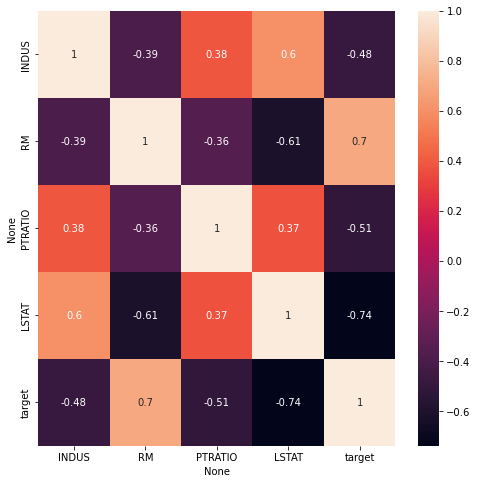

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True) # 히트맵으로 표시

<AxesSubplot:ylabel='Density'>

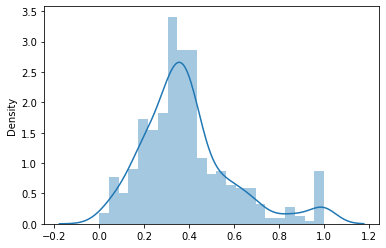

In [88]:
sns.distplot(df[['target']]) # 주택가격(target)의 분포 확인

<AxesSubplot:ylabel='Density'>

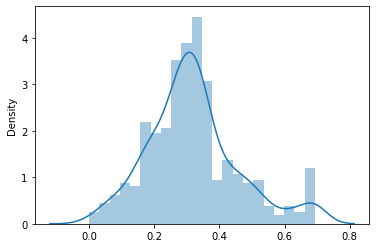

In [89]:
# 로그 변환 -> why?
# 표본을 가지고 모집단을 추정하므로 모집단이 정규분포를 최대한 이룬다고 봐야 정확도가 높음, 표본에도 똑같이 적용하기위해
# 최대한 정규분포에 맞춰 데이터 변환 -> 로그 변환  -> 개선됌
import numpy as np
df['target']=np.log1p(df.target)
sns.distplot(df.target)

In [90]:
# 로그 변환 환원
df['target']= np.expm1(df.target) # numpy에서 제공 expm1
df.head()

,INDUS,RM,PTRATIO,LSTAT,target
0,0.067815,0.577505,0.287234,0.089680,0.422222
1,0.242302,0.547998,0.553191,0.204470,0.368889
2,0.242302,0.694386,0.553191,0.063466,0.660000
3,0.063050,0.658555,0.648936,0.033389,0.631111
4,0.063050,0.687105,0.648936,0.099338,0.693333


In [ ]:
# mtcars.csv를 불러와서 0 ~ 1 스케일로 정규화한 후 qsec 컬럼이 0.5보다 큰 관측치의 개수를 구하시오.

In [107]:
file_data = pd.read_csv('./dataset/mtcars.csv', encoding = 'utf-8')
scaler=MinMaxScaler()
li=['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs','am', 'gear', 'carb']

for i in li:
     file_data[i] = scaler.fit_transform(file_data[[i]]) 
    # 이때 fit_transform(안에는 2차원은 제외)


#print(file_data.head())  

len(file_data.loc[file_data['qsec']>0.5,['qsec']])


9

In [116]:
from sklearn.preprocessing import MinMaxScaler

df=pd.read_csv('./dataset/mtcars.csv', index_col=0) # 특정 열을 index로 지정
# print(df.head(),type(df), '\n')

scaler=MinMaxScaler()
scaled=scaler.fit_transform(df)
# print(type(scaled))

df = pd.DataFrame(scaled,columns=df.columns)
print(df.loc[df['qsec']>0.5,['qsec']])

        qsec
3   0.588095
5   0.680952
7   0.654762
8   1.000000
10  0.523810
17  0.591667
19  0.642857
20  0.655952
25  0.523810


In [117]:
 df=pd.read_csv('./dataset/mtcars.csv', index_col=0)
 df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
# 참조 url
# https://programmerpsy.tistory.com/17

In [6]:
# 결합
import numpy as np
import pandas as pd

data1=np.arange(1,21).reshape(4,5)
data2 =np.arange(11,31).reshape(5,4)

df1=pd.DataFrame(data1,columns=['a','b','c','d','e'])
df2=pd.DataFrame(data2, columns=['d','e','h','i'])

print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


In [7]:
# 열방향 결합 -> 세로, axis =1 -> 책을 세워서 정리 ( 왼쪽+오른쪽 합치기 )
con1=pd.concat([df1, df2], axis=1)
con1

,a,b,c,d,e,d,e,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [8]:
# 행방향 결합 -> 가로, axis=0 -> 책을 눕혀 정리 ( 위+아래로 합치기)
# defualt 값이 axis=0임
con2=pd.concat([df1,df2],axis=0)
con2

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
0,NaN,NaN,NaN,11,12,13.0,14.0
1,NaN,NaN,NaN,15,16,17.0,18.0
2,NaN,NaN,NaN,19,20,21.0,22.0
3,NaN,NaN,NaN,23,24,25.0,26.0
4,NaN,NaN,NaN,27,28,29.0,30.0


In [9]:
# 기존 index를 무시하고 싶을 경우 --> ignore_index=True
con3 = pd.concat([df1,df2], axis=0, ignore_index=True)
con3 # 0 1 2 3 0 1 2 3 4 가 아님 0 1 2 3 4 5 6 7 8

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
4,NaN,NaN,NaN,11,12,13.0,14.0
5,NaN,NaN,NaN,15,16,17.0,18.0
6,NaN,NaN,NaN,19,20,21.0,22.0
7,NaN,NaN,NaN,23,24,25.0,26.0
8,NaN,NaN,NaN,27,28,29.0,30.0


In [10]:
df1 # 4행 5열

,a,b,c,d,e
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15
3,16,17,18,19,20


In [11]:
df2 # 5행 4열

,d,e,h,i
0,11,12,13,14
1,15,16,17,18
2,19,20,21,22
3,23,24,25,26
4,27,28,29,30


# DataFrame Join
## Join 이란?

- 두 개의 DataFrame을 합치는 것
- 열 기준 컬럼명으로 합치기 : merge
- 열 기준 Index명로 합치기 : merge, concat
- 행 기준으로 합치기 : concat, append

### 합치는 방법은?

- Inner : 두 DataFrame의 기준 컬럼에서 둘 다 존재하는 데이터만 Join
- Left Outer join : 왼쪽 DataFrame으로 합치기
- Right Outer Join : 오른쪽 DataFrame으로 합치기
- Outer Join : 두 DataFrame의 모든 Data를 합치기

### 데이터 병합
- 일반적인 결합 concat
- index로 할 경우 join
* 교집합 -> 디폴트 값이 how=inner (안써도 가능)
* 합집합 -> outer로 명시
* 특정 칼럼의 조건으로 결합할 경우는 merge, 기준이 되는 칼럼은 on='기준되는 칼럼'

In [12]:
# 교집함 
# d와 e 가 중첩되므로 lsuffix, rsufflix 접미사 사용하여 구분
df1.join(df2, lsuffix='_1', rsuffix='_2', how='inner') # 교집합 default 값이 inner라 안써도 무방
# DataFrame.join()메서드에서 lsuffix 및 rsuffix 는 접미사 역할
# 조인 대상 DataFrame에 같은 이름의 컬럼이 있으면 에러 -> 접미사 활용하면 오류 없
# 4행 5열 교집합 5행 4열 --> 4행 9열

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [13]:
# 합집합
df1.join(df2, lsuffix='_1', rsuffix='_2', how='outer')
# 4행 5열 합집합 5행 4열 --> 5행 9열

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


##### 파이선 join 함수 설명  <'구분자'.join(리스트)
  - .join(리스트)
       - .join(리스트)를 이용하면 매개변수로 들어온 ['a','b','c'] 이런식의 리스트를 'abc'의 문자열로 합쳐서 반환해주는 함수
  - '구분자'.join(리스트)
       - '구분자'.join(리스트)를 이용하면 리스트의 값과 값 사이에 '구분자'에 들어온 구분자를 넣어서 하나의 문자열로 합쳐줌
       - '_'.join(['a','b','c']) 라 하면 "a_b_c" 문자열을 만들어서 반환

In [17]:
a = ['a', 'b', 'c', 'd', '1', '2', '3']
print(a) 
print()
 
# 리스트를 문자열로 : join 이용
result1 = "".join(a)
print(result1)
 
# 리스트를 문자열로 : 하나하나 문자열을 더해서 (for문 이용)
result2 = ''
for v in a:
    result2+=v
print(result2)

['a', 'b', 'c', 'd', '1', '2', '3']

abcd123
abcd123


In [16]:
# DataFrame 객체.join(others 객체, how='', lsuffix='', rsuffix='')
# df_A.join(df_b) 형식

df1['ind']=[10,9,8,7] # 컬럼의 데이터가 index로 설정됨
df2['ind']=[1,2,3,4,5] # 컬럼의 데이터는 삭제됨
#default 값은 how = inner
df1.set_index('ind').join(df2.set_index('ind'),lsuffix='_1',rsuffix='_2')

,a,b,c,d_1,e_1,d_2,e_2,h,i
ind,,,,,,,,,
10,1,2,3,4,5,NaN,NaN,NaN,NaN
9,6,7,8,9,10,NaN,NaN,NaN,NaN
8,11,12,13,14,15,NaN,NaN,NaN,NaN
7,16,17,18,19,20,NaN,NaN,NaN,NaN


In [132]:
# 합집합 how = 'outer'
# pd.merge(합칠 dataframe, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False)
# df_a.merge(df_b) 형식

pd.merge(df1,df2,on='ind',how='inner')  # 기준이 되는 컬럼 on='기준이 되는 컬럼'

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1,2,3,4,5,1,11,12,13,14
1,6,7,8,9,10,2,15,16,17,18
2,11,12,13,14,15,3,19,20,21,22
3,16,17,18,19,20,4,23,24,25,26


###### 같은 Index 기준으로 합치기
###### set_index('컬럼명') : 컬럼명의 데이터가 index로 설정
   - 컬럼데이터는 삭제됨

In [35]:
import pandas as pd
from pandas import Series, DataFrame

DF1 = DataFrame([["싸이",180,75],["덕구",160,65],["또치",170,75]], columns = ["이름","키","몸무게"])
DF1

,이름,키,몸무게
0,싸이,180,75
1,덕구,160,65
2,또치,170,75


In [36]:
DF2 = DataFrame([['싸이','포워드','잘함'],['덕구','미드필더','못함'],['원순','수비수','잘함']], columns=['이름','포지션','실력'])
DF2

,이름,포지션,실력
0,싸이,포워드,잘함
1,덕구,미드필더,못함
2,원순,수비수,잘함


In [37]:
# set_index('칼럼명') :칼럼명의 데이터가 index로 설정
# 칼럼데이터는 삭제됨

DF1_1=DF1.set_index('이름')
DF1

,이름,키,몸무게
0,싸이,180,75
1,덕구,160,65
2,또치,170,75


In [38]:
DF1_1 # 설정 후 -> 칼럼명의 데이터가 INDEX로 설정

,키,몸무게
이름,,
싸이,180,75
덕구,160,65
또치,170,75


In [39]:
DF2=DF2.set_index('이름')
DF2

,포지션,실력
이름,,
싸이,포워드,잘함
덕구,미드필더,못함
원순,수비수,잘함


##### Merge 명령어 사용법
 - pd.merge(left, right, how, on, left_on, right_on, left_index, right_index)
 - left : Merge 할 왼쪽 DataFrame
 - right : Merge 할 오른쪽 DataFrame
 - how : inner, left, right, outer (기본 값 inner)
 - on : 두 DataFrame을 Join할 기준 컬럼명(컬럼명이 동일할 경우)
 - left_on : Join할 기준 컬럼의 왼쪽 DataFrame의 컬럼명
 - right_on : Join할 기준 컬럼의 오른쪽 DataFrame의 컬럼명
 - left_index : 왼쪽 DataFrame index로 Join할 경우 True
 - right_index : 오른쪽 DataFrame index로 Join할 경우 True

In [43]:
pd.merge(left = DF1_1, right = DF2, left_index = True, right_index = True, how = "inner")

,키,몸무게,포지션,실력
이름,,,,
싸이,180,75,포워드,잘함
덕구,160,65,미드필더,못함


In [41]:
pd.concat([DF1_1,DF2],axis=1, join='inner') # axis =1 열( 책 세워)

,키,몸무게,포지션,실력
이름,,,,
싸이,180,75,포워드,잘함
덕구,160,65,미드필더,못함


In [138]:
# 판다스 파일 읽고 저장
# csv 파일 읽고 저장

ar1 =np.arange(10)
li1 = ar1.reshape(2,5)

df=pd.DataFrame(li1, columns =['c0','c1','c2','c3','c4'])
df.to_csv('./dataset/read_csv_sample.csv', index=False)
# df.to_csv('./dataset/read_csv_sample.csv')
# index=false 없을 경우 이상하게 뜸 (unnamed)

In [134]:
#빅분기랑 연관(실기)
df1 = pd.read_csv('./dataset/read_csv_sample.csv')
# df1 = pd.read_csv('./dataset/read_csv_sample.csv',index_col=0)
#index_col=0 하면 unnamed 없어짐
df1

,c0,c1,c2,c3,c4
0,0,1,2,3,4
1,5,6,7,8,9


In [135]:
# header=None 옵션(데이터셋에 헤더가 없는 경우)
df1=pd.read_csv('./dataset/read_csv_sample.csv', header=None)
df1

,0,1,2,3,4
0,c0,c1,c2,c3,c4
1,0,1,2,3,4
2,5,6,7,8,9


In [139]:
# Json 파일 읽고 쓰기
df1.to_json('./dataset/df_j.json') #  데이터프레임.to_json(파일경로 파일명)
df_j =pd.read_json('./dataset/df_j.json') # 데이터프레임.read_json
df_j

,0,1,2,3,4
0,c0,c1,c2,c3,c4
1,0,1,2,3,4
2,5,6,7,8,9


In [140]:
# 바이너리 파일로 읽고 쓰기
df1.to_pickle('./dataset/df2.pkl')
df2=pd.read_pickle('./dataset/df2.pkl')
df2

,0,1,2,3,4
0,c0,c1,c2,c3,c4
1,0,1,2,3,4
2,5,6,7,8,9


In [143]:
# 파이썬 외장함수(pickle) -> 저장 시 dump 읽을 시 load
import pickle

f=open('./dataset/test.txt','wb') #바이너리 모드
data={1:'python',2:'you need'}
pickle.dump(data,f) # 파이썬 객체를 직렬화하여 이진 파일(바이너리 파일)에 저장
f.close()

In [148]:
f=open('./dataset/test.txt','rb')
data=pickle.load(f)
print(data)
f.close()

{1: 'python', 2: 'you need'}


In [149]:
!pip install openpyxl

In [173]:
# 엑셀 파일
df_ex = pd.read_csv('./dataset/auto-mpg.csv')
df_ex.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [159]:
# csv 파일에서 컬럼명 추출
df_ex.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [174]:
df_ex1 = df_ex[['mpg', 'cylinders','horsepower', 'weight']]
df_ex1.to_excel('./dataset/auto-mpg_ex1.xlsx',index=False) # 복사본 설정
df_ex1 = pd.read_excel('./dataset/auto-mpg_ex1.xlsx')
df_ex1.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


### 연산
- 행/열 인덱스를 기준으로 모든 원소를 정렬한다
- 동일한 위치에 있는 원소끼리 일대일 대응시킨다
- 일대일 대응이 되는 원소끼리 연산을 처리한다

In [183]:
st1=pd.Series({'국어':100,'영어':80,'수학':90})
st2=pd.Series({'수학':80,'국어':90,'영어':80})

add=st1+st2
sub=st1-st2
mul=st1*st2
div=round((st1/st2),2)
print(type(add))

df=pd.concat([add,sub,mul,div], axis=1) #데이터프레임생성 
df                       # 열 책을 옆으로 정리 ( 왼쪽+오른쪽 합치기 )

<class 'pandas.core.series.Series'>


,0,1,2,3
국어,190,10,9000,1.11
수학,170,10,7200,1.12
영어,160,0,6400,1.00


In [181]:
st1=pd.Series({'국어':100,'영어':80,'수학':90})
st2=pd.Series({'수학':80, '국어':90,'영어':80})

add=st1+st2
sub=st1-st2
mul=st1*st2
div=round((st1/st2),2)

result=pd.DataFrame([add,sub,mul,div], index=['덧셈','뺄셈','곱셈','나눗셈'])
result

,국어,수학,영어
덧셈,190.00,170.00,160.0
뺄셈,10.00,10.00,0.0
곱셈,9000.00,7200.00,6400.0
나눗셈,1.11,1.12,1.0


In [184]:
li=list('abcdefg')
li

['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [185]:
df1=pd.DataFrame(np.arange(12.).reshape(3,4),columns=list('abcd'))
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [188]:
df1=pd.DataFrame(np.arange(12.).reshape(3,4),columns=list('abcd'))
df2=pd.DataFrame(np.arange(20.).reshape(4,5),columns=list('abcde'))

df2.loc[1,'b'] =np.nan # df2의 2행 b열에 nan값
print(df1,'\n')
print(df2)

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0 

      a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   NaN   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0


In [189]:
df1+df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [190]:
# df1 + df2 하고 NaN값은 0으로 채우기
df1.add(df2,fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [193]:
# sub(), mul(), div()을 사용하여 df2의 NaN 값을 0으로 대체하여 연산
'''
sub=st1-st2
mul=st1*st2
div=round((st1/st2),2)
'''
sub_data = df1.sub(df2,fill_value=0)
mul_data = df1.mul(df2,fill_value=0)
div_data = round(df1.div(df2, fill_value=0),2)

print(df1.sub(df2,fill_value=0),'\n')
print(mul_data,'\n')
print(div_data,'\n')

      a     b     c     d     e
0   0.0   0.0   0.0   0.0  -4.0
1  -1.0   5.0  -1.0  -1.0  -9.0
2  -2.0  -2.0  -2.0  -2.0 -14.0
3 -15.0 -16.0 -17.0 -18.0 -19.0 

      a     b      c      d    e
0   0.0   1.0    4.0    9.0  0.0
1  20.0   0.0   42.0   56.0  0.0
2  80.0  99.0  120.0  143.0  0.0
3   0.0   0.0    0.0    0.0  0.0 

     a     b     c     d    e
0  NaN  1.00  1.00  1.00  0.0
1  0.8   inf  0.86  0.88  0.0
2  0.8  0.82  0.83  0.85  0.0
3  0.0  0.00  0.00  0.00  0.0 



In [198]:
# reindex 경우 fill_value 지정
print(df1,'\n')
print(df1.reindex(columns=df2.columns, fill_value=0))

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0 

     a    b     c     d  e
0  0.0  1.0   2.0   3.0  0
1  4.0  5.0   6.0   7.0  0
2  8.0  9.0  10.0  11.0  0


In [201]:
# DataFrame과 Series간 연산
df=pd.DataFrame(np.arange(12.).reshape(4,3), columns=list('bde'), index=['Utah','Ohio','Texas','Oregon'])
df

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [202]:
# utah 출력
series = df.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [203]:
df - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0
